<a href="https://colab.research.google.com/github/chenweioh/GCP-Inspector-Toolkit/blob/main/Fraud_Detection_in_BE_Trials_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📖 **User Guide: Fraud Detector in Bioequivalence (BE) Trials – Version 2.0**  

---

### 🆕 **What's New in Version 2.0**  

#### 🔄 **Major Updates**  
- **Migration to R Code:**  
  The tool has migrated from Python to **R**, utilizing the **nlme::lme** package for linear mixed-effects modeling. The **nlme::lme** implementation is equivalent to **SAS PROC MIXED**, as demonstrated by Park et al. (2020).

- **Multi-File and Multi-Sheet Support:**  
  Now supports multiple **Excel files** with multiple **sheets**, allowing comprehensive batch analyses.  

- **Enhanced Output:**  
  - Results are displayed in the console, followed by live plots.  
  - Outputs are saved as **CSV** (results) and **PDF** (plots).  
  - All files are packaged into a **ZIP** for easy download.  

- **Outcome Variable Flexibility:**  
  The tool now supports **AUCT**, **Cmax**, and **Var** as dependent variables. It runs separate analyses and generates corresponding plots for each.

- **Live Process Tracking:**  
  The tool prints the step-by-step process, showing model fitting, result generation, and immediate plot visualization.

#### 📄 **Reference to R Code Implementation:**  
The **nlme::lme** modeling approach used in this tool is statistically equivalent to **SAS PROC MIXED**, as detailed in the following publication:  

**Park G, Kim H, Bae KS.**  
*"Bioequivalence data analysis."*  
_Transl Clin Pharmacol._ 2020 Dec;28(4):175-180.  
**doi:** [10.12793/tcp.2020.28.e20](https://doi.org/10.12793/tcp.2020.28.e20)  
**PMID:** 33425800 | **PMCID:** [PMC7781810](https://pmc.ncbi.nlm.nih.gov/articles/PMC7781810/)  

This ensures that the statistical framework used is aligned with widely accepted industry practices.

---

## 📋 **Overview**  
**Fraud Detector in BE Trials** is a powerful R-based tool designed to analyze **bioequivalence (BE)** trials and detect potential irregularities or fraudulent activities. Inspired by the **third plot method** from **Anders Fuglsang**, the tool employs linear mixed-effects modeling to scrutinize bioequivalence data and uncover anomalies.  

---

## 📚 **Table of Contents**  
1. [Requirements](#requirements)  
2. [Getting Started](#getting-started)  
3. [Excel Format](#excel-format)  
4. [Uploading Data](#uploading-data)  
5. [Security Warning](#security-warning)  
6. [Running the Analysis](#running-the-analysis)  
7. [Interpreting Results](#interpreting-results)  
8. [Saving and Downloading Outputs](#saving-and-downloading-outputs)  
9. [Troubleshooting](#troubleshooting)  
10. [Reference to Original Articles](#reference-to-original-articles)  
11. [Feedback and Contributions](#feedback-and-contributions)  

---

## ✅ **Requirements**  
- **Internet Connection:** Required for running the tool in **Google Colab**.  
- **Data Format:** Excel files (**.xlsx**) formatted as per the template provided.  
- **Google Account:** For using **Google Colab**.

---


---

## 🚀 **Getting Started**

1. **Open the Notebook in Google Colab**  
   - Open the notebook in **[Google Colab](https://colab.research.google.com/)**.  
   - **⚠️ Important:** Some institutions (e.g., **NPRA**) may restrict access to **Google Colab**.  
     - If access is blocked, use a **personal Google account** to run the tool.  
     - **Google Colab** is free and only requires a standard **Google account**.

2. **Change Runtime Type to R**  
   By default, **Google Colab** uses Python. Follow these steps to switch to **R**:  
   - Click on **“Runtime”** in the top menu.  
   - Select **“Change runtime type”**.  
   - In the **“Runtime type”** dropdown, select **“R”**.  
   - Click **“Save”**.

## 🚀 **Uploading Data**

3. **Manually Upload Your Excel Files (Before Running Any Cells)**  
   **⚠️ Note:** You must upload your Excel files **before** running any code cells. The tool no longer prompts for uploads during execution.

   **To upload your Excel files:**  
   - In **Google Colab**, open the **left sidebar** and click the **folder icon** to access the **Files** tab.  
   - Click the **“Upload”** button (an upward arrow icon).  
   - Select your **Excel file(s)** (**.xlsx**) from your local machine and upload them.  
   - Uploaded files will appear under the **`/content/`** directory.

   ✅ **Example:**  
   If you upload a file named **`study_data.xlsx`**, it will be located at:  
   ```
   /content/study_data.xlsx
   ```

### ⚡ **Key Reminders:**  
- **Upload Excel files before running any cells** to avoid file detection errors.  
- **Switch the runtime to R** before starting the analysis.  
- Use a **personal Google account** if your institution restricts access to **Google Colab**.

🚀📊✅

---

## 📊 **Excel Format**  
Your **Excel** file should have the following columns:

| Subj | Seq | Per | Trt | AUCT | Cmax | Var |  
|------|-----|-----|-----|------|------|-----|  
| 1    | 1   | 1   | R   | ...  | ...  | ... |  
| 1    | 1   | 2   | T   | ...  | ...  | ... |  
| 2    | 2   | 1   | T   | ...  | ...  | ... |  
| 2    | 2   | 2   | R   | ...  | ...  | ... |  

**Required Columns:**  
- **Subj:** Subject ID  
- **Seq:** Sequence group  
- **Per:** Period  
- **Trt:** Treatment (R for Reference, T for Test)  
- **AUCT, Cmax or Var:** Outcome variables for analysis  

**💡 Important Note:**  
The order of subjects should follow the sequence in which samples were analyzed in the bioanalytical lab, not the subject number.  
> _E.g., If **Subject 3** was analyzed first in the lab, treat it as **Subject "1"** in this analysis._

The code is designed to handle case-insensitive column names (e.g., Subj, subj, SUBJ will all be recognized).

However, for best practices and to avoid potential issues, it is recommended to prepare your data using case-sensitive column names exactly as shown above.


---

## ⚠️ **Security Warning**  
When opening the notebook in **Google Colab**, you may encounter this message:

> _"This notebook was not authored by Google. It may request access to your data."_  

This is a standard warning. After reviewing the code, click **“Run Anyway”** to proceed. The tool runs entirely within Colab and does not store data externally.

---

## 📈 **Running the Analysis**  
1. The tool loops through **each Excel file** and **sheet**.  
2. For every **outcome variable (AUCT, Cmax, Var):**  
   - It fits a **mixed-effects model** using **nlme::lme**:  
     ```R
     lme(log(Outcome) ~ Seq + Per + Trt, random = ~1 | Seq/Subj)
     ```  
   - **90% Confidence Intervals** are computed for the treatment effect (**T vs R**).  
3. **Subset Analysis:**  
   - Starts with **6 subjects** and incrementally adds more, analyzing trends across different subject counts.

During execution, the tool will print:  
- **Model fitting details**  
- **Geometric Mean Ratios (GMR)** and **90% Confidence Intervals (90% CI)**  
- **Live plots** for each analysis step

🧪 **About Study Designs:**  
- The script has been primarily tested on **2-period crossover** designs.  
- **3-period partial replicate** and **4-period full replicate** designs are **not fully tested**, but the script is expected to handle them correctly.  

📋 **Handling Missing Data:**  
- This modeling method allows the analysis to **continue even if subjects have missing data** (e.g., when a subjects lacks data for either the **T** or **R** treatment, resulting in a missing row).  
- It is advisable to have the **CRO (Contract Research Organization)** declare which subjects are included in the analysis when fitting the model (**PROC MIXED**) to ensure clarity in subject selection for **Geometric Mean (GM)** calculations.

📊 **Full Replicate Study Considerations:**  
- In **4-period full replicate** studies, subjects with two **R** treatments but missing **T** can still contribute to estimating **within-subject variability**.  
- This variability helps in calculating the **coefficient of variation (CV)**, essential for methods like **reference-scaled bioequivalence (RSABE)** to justify widening confidence intervals.  


---

This version now explicitly states that the **modeling method** supports datasets with **missing values** and will continue the analysis while using available data for **variance** and **ratio** calculations. 🚀📊✅

---

## 📊 **Interpreting Results**  
- **Plots** show the **GMR** and **90% CI** across different subject subsets.  
- **Tables** summarize GMRs and CIs for each subset.  
- Live plots will display in the notebook, with the option to download them as **PDFs**.

---

## 💾 **Saving and Downloading Outputs**  
1. **Results** are saved as **CSV** files.  
2. **Plots** are saved as **PDF** files.  
3. Navigate to the **Files** tab in Google Colab and open the **output folder** to view the generated CSV and PDF files.
4. All outputs are packaged into a **ZIP** file for download.  

📂 **Example ZIP Contents:**  
```
/output_files.zip  
├── study1_sheet1_AUCT_results.csv  
├── study1_sheet1_AUCT_plot.pdf  
├── study1_sheet2_Cmax_results.csv  
├── study1_sheet2_Cmax_plot.pdf  
└── ...  
```

---

## 🛠️ **Troubleshooting**  
- **File Upload Issues?**  
  Ensure the file is in **.xlsx** format and follows the required column structure.  

- **Model Fitting Errors?**  
  May occur if there are missing values or insufficient data for subsets. Review the console for specific errors.  

- **Plots Not Displaying?**  
  Ensure that **ggplot2** is installed and loaded. The tool handles this automatically but double-check if issues arise.

  
---

## 📖 **Reference to Original Articles**  
- **Fuglsang, A.**  
  _"Detection of data manipulation in bioequivalence trials using a third plot approach."_  
  [Link](https://www.sciencedirect.com/science/article/abs/pii/S0928098720303833) | [Data](https://www.google.com/url?q=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2F1JgJ0ooZRjjOD2D9H0cIp3Uq45zku0C8i%2Fedit%3Fusp%3Ddrive_link%26ouid%3D102636526263516889334%26rtpof%3Dtrue%26sd%3Dtrue)

- **R Code Implementation Reference:**  
  The **nlme::lme** model used in this tool is equivalent to **SAS PROC MIXED**, as detailed in:  

  **Park G, Kim H, Bae KS.**  
  _"Bioequivalence data analysis."_  
  _Transl Clin Pharmacol._ 2020 Dec;28(4):175-180.  
  **doi:** [10.12793/tcp.2020.28.e20](https://doi.org/10.12793/tcp.2020.28.e20)  
  [Link](https://pmc.ncbi.nlm.nih.gov/articles/PMC7781810/)

---

## 💡 **Feedback and Contributions**  
We welcome your feedback! 💬  
- **Feature requests?** Found a **bug?** Want to **contribute**?  
  Submit issues or pull requests on our **GitHub repository**

If you have any questions or need further assistance:  
- 📩 **Email me:** [vohchenwei@gmail.com](mailto:vohchenwei@gmail.com)  
- 💼 **Connect on LinkedIn:** [Chen-Wei Oh](https://www.linkedin.com/in/chenwei-oh/) or drop me a message directly on LinkedIn.  

📧 _Thank you for using the Fraud Detector in BE Trials – Version 2.0!_ 🚀📊✅  

---

**The writing of this guide was assisted by ChatGPT and check by myself.**

✅ Found uploaded files:
[1] "/content//ler_pk missing T subject.xlsx"  
[2] "/content//ler_pk preparation example.xlsx"

📁 Processing Workbook: ler_pk missing T subject

📄 Processing Sheet: Sheet1
✅ Found outcome variables: AUCT, CMAX

🚀 Processing Outcome Variable: AUCT

⚡ Fitting lme model for AUCT with 6 subjects...

📊 Subset with 6 subjects (AUCT):
Point Estimate (GMR): 1.3147
90% CI: [1.0281, 1.6812]

⚡ Fitting lme model for AUCT with 7 subjects...

📊 Subset with 7 subjects (AUCT):
Point Estimate (GMR): 1.2035
90% CI: [0.9035, 1.6031]

⚡ Fitting lme model for AUCT with 8 subjects...

📊 Subset with 8 subjects (AUCT):
Point Estimate (GMR): 1.1735
90% CI: [0.8791, 1.5666]

⚡ Fitting lme model for AUCT with 9 subjects...

📊 Subset with 9 subjects (AUCT):
Point Estimate (GMR): 1.1347
90% CI: [0.8854, 1.4543]

⚡ Fitting lme model for AUCT with 10 subjects...

📊 Subset with 10 subjects (AUCT):
Point Estimate (GMR): 1.1265
90% CI: [0.9103, 1.3940]

⚡ Fitting lme model for AUCT with 11 sub

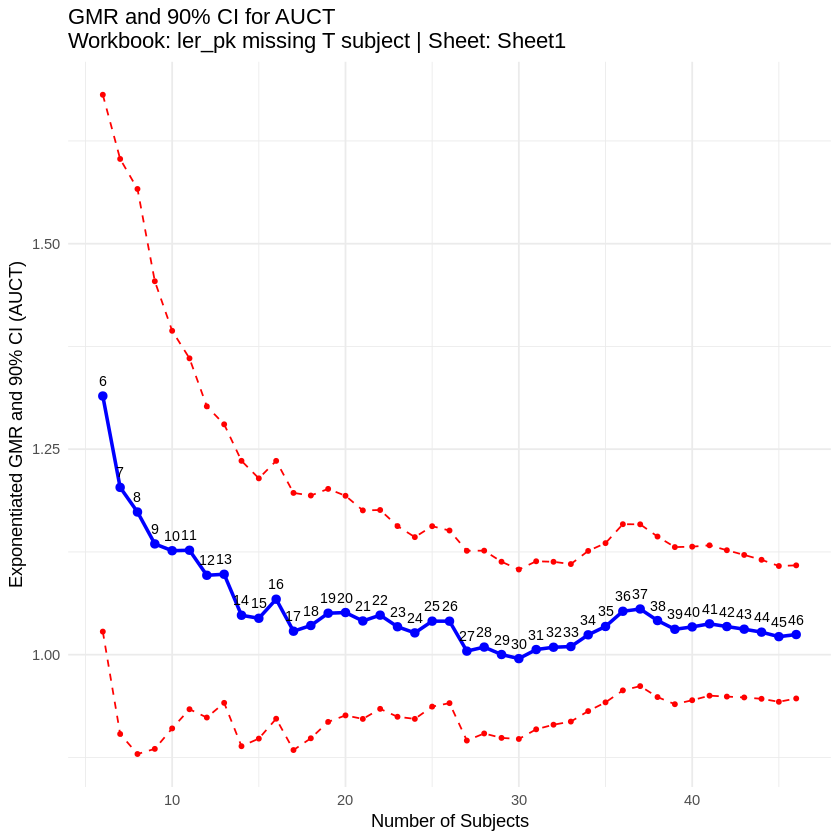

📁 Saved plot to: /content/output/ler_pk missing T subject_Sheet1_CMAX_plot.pdf

📁 Processing Workbook: ler_pk preparation example

📄 Processing Sheet: Sheet1
✅ Found outcome variables: AUCT, CMAX

🚀 Processing Outcome Variable: AUCT

⚡ Fitting lme model for AUCT with 6 subjects...

📊 Subset with 6 subjects (AUCT):
Point Estimate (GMR): 1.3147
90% CI: [1.0281, 1.6812]

⚡ Fitting lme model for AUCT with 7 subjects...

📊 Subset with 7 subjects (AUCT):
Point Estimate (GMR): 1.2035
90% CI: [0.9035, 1.6031]

⚡ Fitting lme model for AUCT with 8 subjects...

📊 Subset with 8 subjects (AUCT):
Point Estimate (GMR): 1.1155
90% CI: [0.8462, 1.4706]

⚡ Fitting lme model for AUCT with 9 subjects...

📊 Subset with 9 subjects (AUCT):
Point Estimate (GMR): 1.0957
90% CI: [0.8622, 1.3926]

⚡ Fitting lme model for AUCT with 10 subjects...

📊 Subset with 10 subjects (AUCT):
Point Estimate (GMR): 1.0866
90% CI: [0.8825, 1.3380]

⚡ Fitting lme model for AUCT with 11 subjects...

📊 Subset with 11 subjects (AU

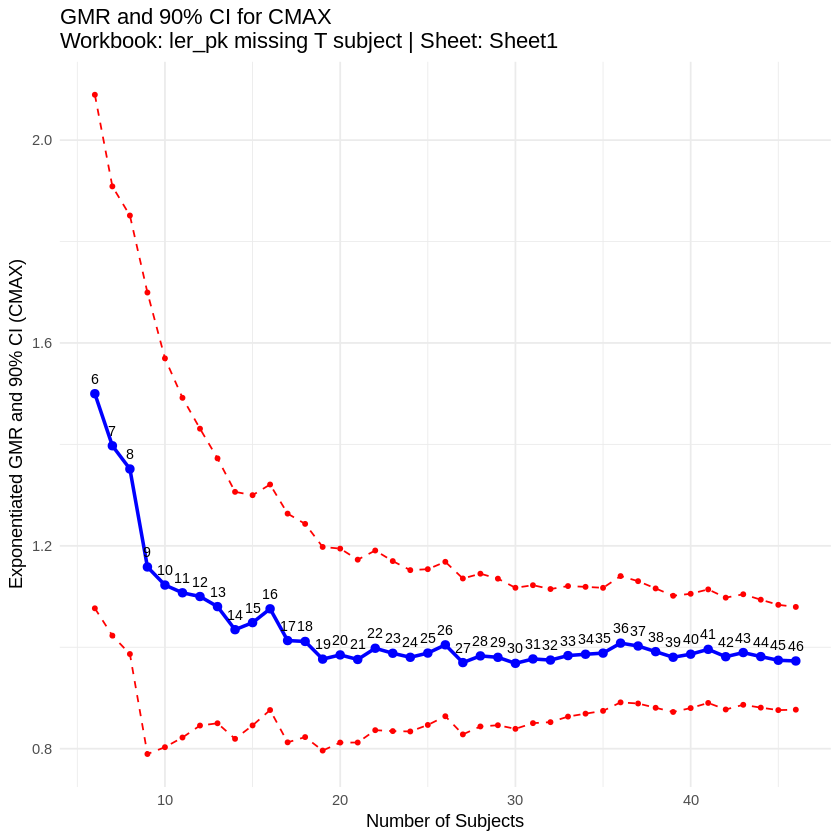

📁 Saved plot to: /content/output/ler_pk preparation example_Sheet1_AUCT_plot.pdf

🚀 Processing Outcome Variable: CMAX

⚡ Fitting lme model for CMAX with 6 subjects...

📊 Subset with 6 subjects (CMAX):
Point Estimate (GMR): 1.5000
90% CI: [1.0768, 2.0895]

⚡ Fitting lme model for CMAX with 7 subjects...

📊 Subset with 7 subjects (CMAX):
Point Estimate (GMR): 1.3973
90% CI: [1.0229, 1.9088]

⚡ Fitting lme model for CMAX with 8 subjects...

📊 Subset with 8 subjects (CMAX):
Point Estimate (GMR): 1.2836
90% CI: [0.9481, 1.7379]

⚡ Fitting lme model for CMAX with 9 subjects...

📊 Subset with 9 subjects (CMAX):
Point Estimate (GMR): 1.1592
90% CI: [0.8254, 1.6279]

⚡ Fitting lme model for CMAX with 10 subjects...

📊 Subset with 10 subjects (CMAX):
Point Estimate (GMR): 1.1233
90% CI: [0.8324, 1.5158]

⚡ Fitting lme model for CMAX with 11 subjects...

📊 Subset with 11 subjects (CMAX):
Point Estimate (GMR): 1.1080
90% CI: [0.8473, 1.4487]

⚡ Fitting lme model for CMAX with 12 subjects...

📊 Sub

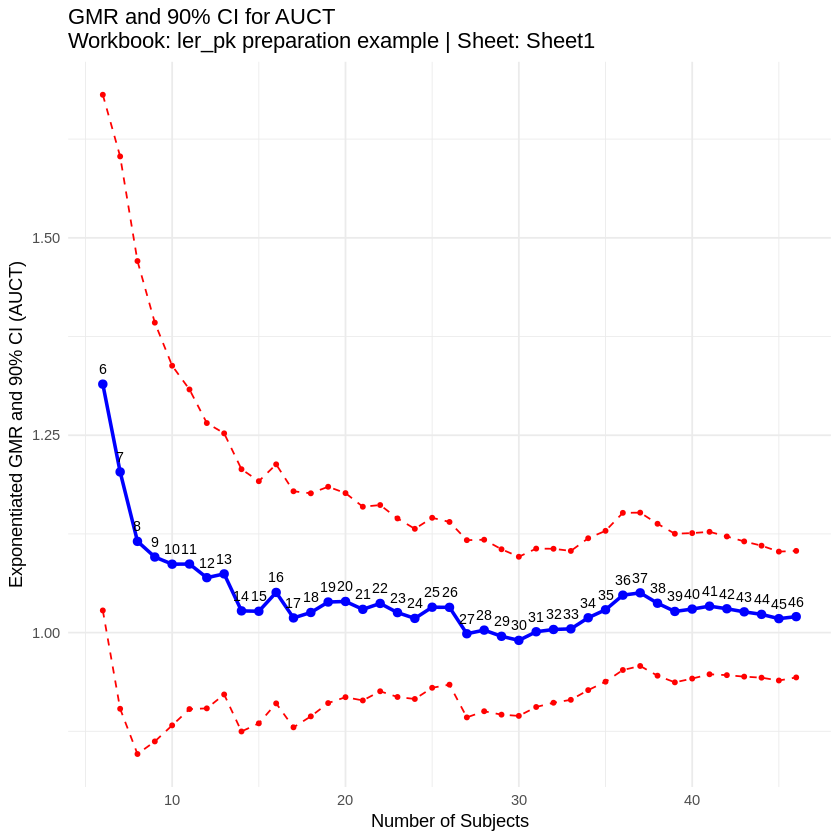

📁 Saved plot to: /content/output/ler_pk preparation example_Sheet1_CMAX_plot.pdf

📦 All results and plots have been zipped: /content/output_files.zip

🔗 Click the link below to download the ZIP file with all results and plots:
Download link: /content/output_files.zip


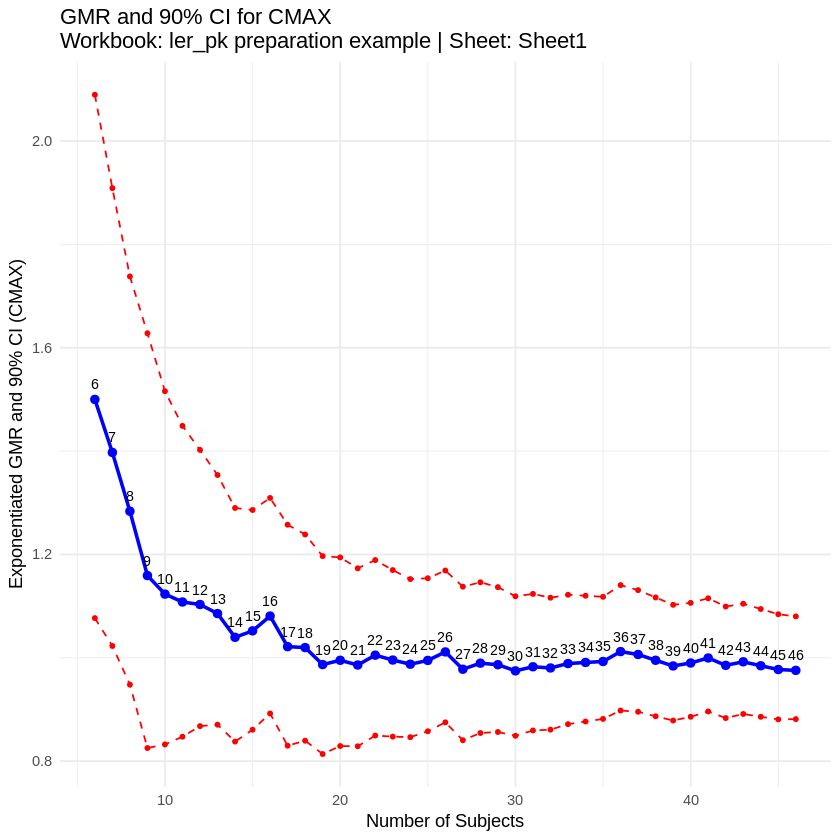

In [2]:
# Load required packages
library(nlme)    # For lme()
library(readxl)  # For reading Excel files
library(ggplot2) # For plotting

# === ✅ STEP 1: Detect and Read Uploaded Excel Files ===
uploaded_files <- list.files(path = "/content/", pattern = "*.xlsx", full.names = TRUE)

if (length(uploaded_files) == 0) {
  stop("❌ Error: No Excel files found in /content/. Please upload your files manually to Google Colab's file system.")
} else {
  cat("✅ Found uploaded files:\n")
  print(uploaded_files)
}

# Create directories for outputs
output_dir <- "/content/output"
dir.create(output_dir, showWarnings = FALSE)

# === ✅ STEP 2: Loop Over Each Workbook ===
for (file_path in uploaded_files) {

  workbook_name <- tools::file_path_sans_ext(basename(file_path))
  cat(sprintf("\n📁 Processing Workbook: %s\n", workbook_name))

  # Get all sheet names in the workbook
  sheet_names <- excel_sheets(file_path)

  # Loop over each sheet in the workbook
  for (sheet_name in sheet_names) {
    cat(sprintf("\n📄 Processing Sheet: %s\n", sheet_name))

    # Read the current sheet
    df <- read_excel(file_path, sheet = sheet_name)

    # Convert column names to uppercase for case-insensitive handling
    colnames(df) <- toupper(colnames(df))

    # Ensure required columns exist
    required_columns <- c("SUBJ", "SEQ", "PER", "TRT")
    if (!all(required_columns %in% colnames(df))) {
      cat(sprintf("❌ Error: The sheet '%s' must contain the columns: SUBJ, SEQ, PER, TRT\n", sheet_name))
      next
    }

    # Check for dependent variables (AUCT, Cmax, Var)
    outcome_vars <- c("AUCT", "CMAX", "VAR")
    available_outcomes <- outcome_vars[outcome_vars %in% colnames(df)]

    if (length(available_outcomes) == 0) {
      cat(sprintf("❌ Error: No outcome variables (AUCT, Cmax, Var) found in the sheet '%s'.\n", sheet_name))
      next
    } else {
      cat(sprintf("✅ Found outcome variables: %s\n", paste(available_outcomes, collapse = ", ")))
    }

    # Convert variables to factors
    df$SUBJ <- as.factor(df$SUBJ)
    df$SEQ <- as.factor(df$SEQ)
    df$PER <- as.factor(df$PER)
    df$TRT <- as.factor(df$TRT)

    # === ✅ STEP 3: Loop Over Outcome Variables ===
    for (outcome in available_outcomes) {

      cat(sprintf("\n🚀 Processing Outcome Variable: %s\n", outcome))

      # Use the full dataset without filtering out zero or missing values
      df_filtered <- df

      # Get unique subjects
      unique_subjects <- unique(df_filtered$SUBJ)
      total_subjects <- length(unique_subjects)

      # Initialize results storage
      results_df <- data.frame(
        n = integer(),
        GMR = numeric(),
        Lower_CI = numeric(),
        Upper_CI = numeric(),
        Subject_IDs = character()
      )

      # Loop over subsets starting from 6 subjects
      for (n in 6:total_subjects) {
        # Select first n unique subjects and subset the data
        selected_subjects <- unique_subjects[1:n]
        sub_df <- df_filtered[df_filtered$SUBJ %in% selected_subjects, ]

        # Ensure proper factor levels after subsetting
        sub_df$SEQ <- droplevels(as.factor(sub_df$SEQ))
        sub_df$PER <- droplevels(as.factor(sub_df$PER))
        sub_df$TRT <- droplevels(as.factor(sub_df$TRT))
        sub_df$SUBJ <- droplevels(as.factor(sub_df$SUBJ))

        # Fit the mixed-effects model
        cat(sprintf("\n⚡ Fitting lme model for %s with %d subjects...\n", outcome, n))
        lme_model <- tryCatch({
          # Use dynamic formula
          model_formula <- as.formula(paste0("log(", outcome, ") ~ SEQ + PER + TRT"))
          suppressWarnings(lme(model_formula, random = ~1 | SEQ/SUBJ, data = sub_df, na.action = na.exclude))
        }, error = function(e) {
          cat(sprintf("❌ Model fitting failed for %d subjects (%s): %s\n", n, outcome, e$message))
          return(NULL)
        })

        # Skip if model fitting failed
        if (is.null(lme_model)) next

        # Compute Confidence Intervals for Fixed Effects
        conf_int <- tryCatch({
          suppressWarnings(intervals(lme_model, 0.90, which = "fixed"))
        }, error = function(e) {
          cat(sprintf("❌ CI extraction failed for %d subjects (%s): %s\n", n, outcome, e$message))
          return(NULL)
        })

        # Skip if CI extraction failed
        if (is.null(conf_int) || !"TRTT" %in% rownames(conf_int$fixed)) {
          cat(sprintf("⚠️ Treatment effect not found for subset with %d subjects (%s).\n", n, outcome))
          next
        }

        # Extract and exponentiate the treatment effect
        estimate <- conf_int$fixed["TRTT", "est."]
        lower <- conf_int$fixed["TRTT", "lower"]
        upper <- conf_int$fixed["TRTT", "upper"]

        gmr <- exp(estimate)
        lower_ci <- exp(lower)
        upper_ci <- exp(upper)

        # Store results with subject IDs
        results_df <- rbind(results_df, data.frame(
          n = n,
          GMR = gmr,
          Lower_CI = lower_ci,
          Upper_CI = upper_ci,
          Subject_IDs = paste(selected_subjects, collapse = ", ")
        ))

        # Print results immediately
        cat(sprintf("\n📊 Subset with %d subjects (%s):\n", n, outcome))
        cat(sprintf("Point Estimate (GMR): %.4f\n", gmr))
        cat(sprintf("90%% CI: [%.4f, %.4f]\n", lower_ci, upper_ci))
      }

      # === ✅ STEP 4: Print Plot and Save Results ===
      if (nrow(results_df) > 0) {

        # --- ✅ Generate and Display Plot ---
        plot <- ggplot(results_df, aes(x = n)) +
          geom_line(aes(y = GMR), color = "blue", size = 1, linetype = "solid") +
          geom_line(aes(y = Lower_CI), color = "red", linetype = "dashed") +
          geom_line(aes(y = Upper_CI), color = "red", linetype = "dashed") +
          geom_point(aes(y = GMR), color = "blue", size = 2) +
          geom_point(aes(y = Lower_CI), color = "red", size = 1) +
          geom_point(aes(y = Upper_CI), color = "red", size = 1) +
          geom_text(aes(y = GMR, label = n), vjust = -1, size = 3, color = "black") +
          labs(
            title = paste("GMR and 90% CI for", outcome, "\nWorkbook:", workbook_name, "| Sheet:", sheet_name),
            x = "Number of Subjects",
            y = paste("Exponentiated GMR and 90% CI (", outcome, ")", sep = "")
          ) +
          theme_minimal() +
          theme(legend.position = "none")

        # Print the plot directly
        print(plot)

        # --- ✅ Save Results Table as CSV ---
        csv_filename <- sprintf("%s_%s_%s_results.csv", workbook_name, sheet_name, outcome)
        csv_filepath <- file.path(output_dir, csv_filename)
        write.csv(results_df, csv_filepath, row.names = FALSE)
        cat(sprintf("\n📁 Saved results to: %s\n", csv_filepath))

        # --- ✅ Save Plot as PDF ---
        pdf_filename <- sprintf("%s_%s_%s_plot.pdf", workbook_name, sheet_name, outcome)
        pdf_filepath <- file.path(output_dir, pdf_filename)
        ggsave(pdf_filepath, plot, width = 8, height = 6)
        cat(sprintf("📁 Saved plot to: %s\n", pdf_filepath))
      } else {
        cat(sprintf("\n⚠️ No valid results to save for %s in %s - %s.\n", outcome, workbook_name, sheet_name))
      }
    }
  }
}

# === ✅ STEP 5: Zip All Outputs for Download ===
zipfile <- "/content/output_files.zip"
zip(zipfile, files = list.files(output_dir, full.names = TRUE))
cat(sprintf("\n📦 All results and plots have been zipped: %s\n", zipfile))

# === ✅ STEP 6: Provide Download Link ===
cat("\n🔗 Click the link below to download the ZIP file with all results and plots:\n")
cat(sprintf("Download link: %s\n", zipfile))
